## Detecting Credit Card Fraud using Machine Learning

**Fraud detection** is a set of proactive measures undertaken to identify and prevent fraudulent activities and financial losses. Its main analytical techniques can be divided into two groups:

- Statistical: statistical parameter calculation, regression, probability distributions, data matching
- Artificial intelligence (AI): data mining, machine learning, deep learning

**Machine learning** represents an essential pillar for fraud detection. Its toolkit provides two approaches:

- Supervised methods: k-nearest neighbors, logistic regression, support vector machines, decision tree, random forest, time-series analysis, neural networks, etc.
- Unsupervised methods: cluster analysis, link analysis, self-organizing maps, principal component analysis, anomaly recognition, etc.

There is no universal and reliable machine learning algorithm for fraud detection. 

Here in this project, I'll conduct the analysis via the following steps.

- Step 1: Exploring the dataset
- Step 2: Modeling and evaluating (Logistic Regression, KNN and Random Forest)
- Step 3: Rebalance the data using SMOTE
- Step 4: Model Improvement and Analysis
    * Hyperparameter tuning
    * Feature importance
    * Confusion matrix
    * Cross-validation
    * Precision
    * Recall
    * F1 score
    * Classification report
    * ROC curve
    * Area under the curve (AUC)

The main challenge for fraud detection systems is to rapidly adapt to constantly changing fraud patterns and fraudsters' tactics and to promptly uncover new and increasingly elaborate schemes. Fraud cases are always in a minority and are well concealed among the real transactions.

## Step 1: Data Exploration (exploratory data analysis, or EDA)

The data came from the Kaggle dataset on Credit Card Fraud Detection: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud. 

The dataset contains transactions made by credit cards in two days in September 2013 by European cardholders, and it contains only numerical input variables which are the result of a PCA transformation due to confidentiality issues.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, \
    confusion_matrix, f1_score, precision_score, average_precision_score, \
    roc_auc_score,  recall_score,  precision_recall_curve #some scoring functions
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
# read the dataset
creditCardData = pd.read_csv('creditcard.csv', index_col=0)

In [3]:
# explore the dataset
creditCardData.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     284

In [4]:
# Are there any missing values?
creditCardData.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
creditCardData.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [6]:
creditCardData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
len(creditCardData)

284807

In [8]:
pd.options.display.max_columns = len(creditCardData) # set to see all column names
creditCardData.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


The dataset contains the following variables:

- Numerically encoded variables V1 to V28: the principal components obtained from a PCA transformation. Due to confidentiality issues, no background information about the original features was provided.
- The `Amount` variable represents the transaction amount.
- The `Class` variable shows whether the transaction was a fraud (1) or not (0).

By their nature, fraud occurrences are fortunately an extreme minority in any list of transactions. However, machine learning algorithms usually work best when the different classes contained in the dataset are more or less equally present.  Otherwise, there's little data to learn from. This problem is called the **class imbalance**.

### Calculating Fraud in the Dataset

Let's calculate the percentage of fraudulent transactions over the total number of transactions in our dataset:

In [9]:
creditCardData['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

We can see that there are 492 frauds out of 284,807 transactions.

In [10]:
round(creditCardData['Class'].value_counts()*100/len(creditCardData)).convert_dtypes()

Class
0    100
1      0
Name: count, dtype: Int64

Let's create a plot to visualize the fraud to non-fraud data points

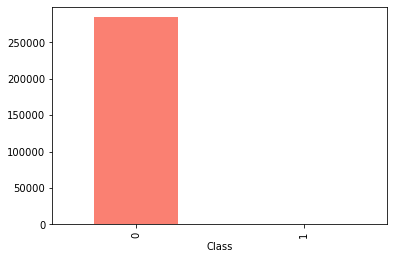

In [11]:
creditCardData['Class'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [12]:
len(creditCardData.columns)

30

In [13]:
def prep_data(df):
    numOfColumn = len(df.columns)
    X = df.iloc[:, 0:numOfColumn - 2] # take the 28 pricipal compenents and the 'Amount' variable
    X = np.array(X).astype(float)
    y = df.iloc[:, numOfColumn - 1]
    y = np.array(y).astype(float)
    return X, y

def plot_data(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1], label='Class #0', alpha=0.5, linewidth=0.15) # plot the first two compenents
    plt.scatter(X[y==1, 0], X[y==1, 1], label='Class #1', alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

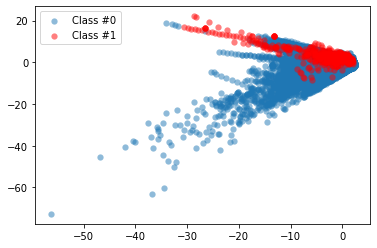

In [14]:
X, y = prep_data(creditCardData)

plot_data(X, y)

### Using SMOTE to Re-Balance the Data 

We can confirm now that the ratio of fraudulent transactions is very low and that we have a case of the class imbalance problem. 

To fix it, we can re-balance our data using the **synthetic minority oversampling technique (SMOTE)**. 

Unlike random oversampling, SMOTE is slightly more sophisticated since it doesn't just create exact copies of observations. Instead, it uses characteristics of nearest neighbors of fraud cases to create new, synthetic samples that are quite similar to the existing observations in the minority class. 

Let's apply SMOTE to our credit card data:

In [15]:
method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X, y)

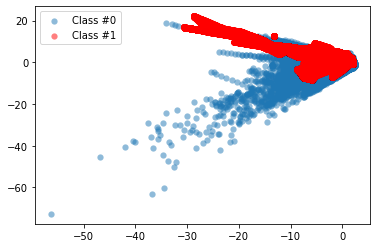

In [16]:
plot_data(X_resampled, y_resampled)

As we can see, using SMOTE suddenly gives us more observations of the minority class. 

To see the results of this approach even better, we'll compare them to the original data:

In [17]:
def compare_plot(X, y, X_resampled, y_resampled, method):
    f, (ax1, ax2) = plt.subplots(1, 2)
    c0 = ax1.scatter(X[y==0, 0], X[y==0, 1], label='Class #0',alpha=0.5)
    c1 = ax1.scatter(X[y==1, 0], X[y==1, 1], label='Class #1',alpha=0.5, c='r')
    ax1.set_title('Original set')
    ax2.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], label='Class #0', alpha=.5)
    ax2.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], label='Class #1', alpha=.5,c='r')
    ax2.set_title(method)
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.)
    plt.tight_layout(pad=3)
    return plt.show()

In [18]:
print(f'Original set:\n'
      f'{pd.value_counts(pd.Series(y))}\n\n'
      f'SMOTE:\n'
      f'{pd.value_counts(pd.Series(y_resampled))}\n')

Original set:
0.0    284315
1.0       492
Name: count, dtype: int64

SMOTE:
0.0    284315
1.0    284315
Name: count, dtype: int64



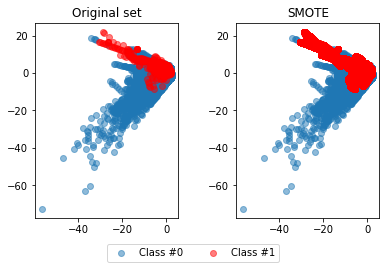

In [19]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

Hence, the SMOTE method has balanced our data completely, and the minority class is now equal in size to the majority class.

We'll return to the practical application of the SMOTE method soon, but for now, let's come back to the original data and try to detect the fraud cases. 

## Step 2: Modeling and Evaluating

### The easiest way to detect fraud

When it comes to fraud, we can create some rules to catch it. Such rules can concern, for example, unusual locations of transactions or suspiciously frequent transactions. 

The idea is to define threshold values based on common statistics, often on the mean values of observations, and use those thresholds on our features to detect fraud.

In [20]:
print(creditCardData.groupby('Class').mean().round(3)[['V1', 'V2', 'V3']])

          V1     V2     V3
Class                     
0      0.008 -0.006  0.012
1     -4.772  3.624 -7.033


In our particular case, let's apply the following conditions: V1 < -3, v2 < 3 and V3 < -5. 

Then, to estimate the performance of this approach, we'll compare the flagged fraud cases to the actual ones:

In [21]:
creditCardData['flag_as_fraud'] = np.where(np.logical_and(creditCardData['V1']<-3, creditCardData['V2']<3, creditCardData['V3']<-5), 1, 0)

In [22]:
pd.crosstab(creditCardData['Class'], creditCardData['flag_as_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0,1
Actual Fraud,,
0,275138,9177
1,431,61


We detected 61 out of 492 fraud cases, but can't detect the other 431, and got 9177 false positives. Let's see if using machine learning techniques can beat those results.

### Machine learning methods

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

#### Method 1: Logistic Regression
Let's first implement a simple logistic regression classification algorithm on our credit card data to identify fraudulent occurrences and then visualize the results on a confusion matrix:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

In [36]:
pd.crosstab(y_test, predictions, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0.0,1.0
Actual Fraud,,
0.0,85285,11
1.0,56,91


In [37]:
lr.score(X_test, y_test)

0.9992158515033414

In [26]:
def print_scores(y_t, y_p):
    print(f'Accuracy  :{accuracy_score(y_t, y_p):.2f}' )
    print(f'Balanced  :{balanced_accuracy_score(y_t, y_p):.2f}' )
    print(f'F1        :{f1_score(y_t, y_p):.2f}' )
    print(f'Precision :{precision_score(y_t, y_p):.2f}' )
    print(f'Recall    :{recall_score(y_t, y_p):.2f}' )
    print(f'roc auc   :{roc_auc_score(y_t, y_p):.2f}' )
    print(f'pr)auc    :{average_precision_score(y_t, y_p):.2f}' )

In [38]:
print_scores(y_test, predictions)

Accuracy  :1.00
Balanced  :0.81
F1        :0.73
Precision :0.89
Recall    :0.62
roc auc   :0.81
pr)auc    :0.55


It's important to note that here we have fewer observations to look at in the confusion matrix because we're only using the test set to calculate the model results on, i.e., only 30% of the whole dataset.

We caught a higher percentage of fraud cases: 61.90% (91 out of 147), compared to the previous result of 12.40% (61 out of 492). We also got far fewer false positives than before, so that's an improvement.

#### combine with SMOTE
Let's now return to the class imbalance problem discussed earlier and explore whether we can enhance the prediction results even further by combining the logistic regression model with the SMOTE resampling method. 

To do it efficiently and in one go, we need to define a pipeline and run it on our data:

In [39]:
# Defining which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
lr = LogisticRegression()

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', lr)])

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

In [40]:
pd.crosstab(y_test, predictions, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0.0,1.0
Actual Fraud,,
0.0,83184,2112
1.0,12,135


In [41]:
lr.score(X_test, y_test)

0.9751413222850321

In [42]:
# the score is the fraction of correct predictions generated by the model
(135+83184)/(135+12+83184+2112)

0.9751413222850321

In [43]:
print_scores(y_test, predictions)

Accuracy  :0.98
Balanced  :0.95
F1        :0.11
Precision :0.06
Recall    :0.92
roc auc   :0.95
pr)auc    :0.06


As we can see, in our case the SMOTE didn't bring a complete improvement: we catch more fraud occurences, but at the same time, we have a much higher number of false positives. 

The explanation here is that resampling doesn’t necessarily lead to better results in all cases. When the fraud cases are very spread out over the data, their nearest neighbors aren't necessarily also fraud cases, so using SMOTE can introduce a bias.

### Method II & III: KNN & Random Forest

In [44]:
# Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

predictions_rfc = rfc.predict(X_test)

pd.crosstab(y_test, predictions_rfc, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0.0,1.0
Actual Fraud,,
0.0,85290,6
1.0,34,113


In [45]:
print_scores(y_test, predictions_rfc)

Accuracy  :1.00
Balanced  :0.88
F1        :0.85
Precision :0.95
Recall    :0.77
roc auc   :0.88
pr)auc    :0.73


In [46]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(), 
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [47]:
model_scores = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model_scores

{'Logistic Regression': 0.9992158515033414,
 'KNN': 0.9994382219725431,
 'Random Forest': 0.9994967405170698}

Since we have the imbalance dataset, directly applying models would be meaningless. 

## Step 3: Applying SMOTE

Let's apply SMOTE first before checking on model scores.

In [48]:
# Create a function to fit and score models after rebalance the data
def fit_and_score_balance(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)
    resampling = SMOTE()
    
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        pipeline = Pipeline([('SMOTE', resampling), (name, model)])
        # Fit the model to the data
        pipeline.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [49]:
model_scores_balance = fit_and_score_balance(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model_scores_balance

{'Logistic Regression': 0.9750008777781679,
 'KNN': 0.9983497770443454,
 'Random Forest': 0.9995552590615966}

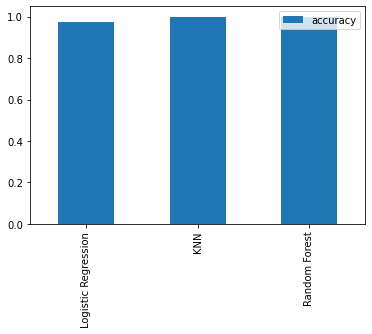

In [50]:
# model comparison
model_compare = pd.DataFrame(model_scores_balance, index = ['accuracy'])
model_compare.T.plot.bar();

## Step 4: Model Improvement and Analysis

Now we've got a baseline model, 
and we know a model's first predictions aren't always what we should base our next steps off. 
What should we do? 

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [51]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 10) # I tried using a large number as 21, but it will break

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [52]:
train_scores

[1.0,
 0.9996187877450292,
 0.9996538994000923,
 0.999598723942136,
 0.9995836760899661,
 0.9995686282377962,
 0.999548564434903,
 0.9995084368291166,
 0.99949840492767]

In [53]:
test_scores

[0.9994967405170698,
 0.9995084442259752,
 0.9994967405170698,
 0.9994148145547324,
 0.9994382219725431,
 0.9994616293903538,
 0.9994616293903538,
 0.9994148145547324,
 0.9994265182636377]

Maximum KNN score on the test data: 99.95%


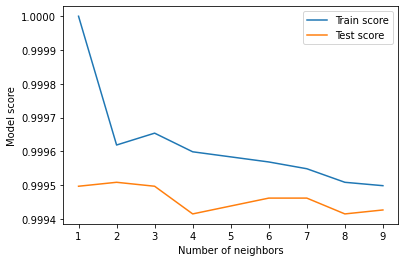

In [54]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(np.arange(1, 10, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')

In [55]:
# we can see that n_neighbors = 2 gives us the highest test score

### Tuning with KNN and SMOTE

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [95]:
# Let's tune KNN

train_scores_knn = []
test_scores_knn = []

# Create a list of different values for n_neighbors
neighbors = range(1, 10) # I tried using a large number as 21, but it will break

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Create a pipeline
    pipeline = Pipeline([('SMOTE', resampling), ('KNN', knn)])
    
    # Fit the model to the data
    pipeline.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores_knn.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores_knn.append(knn.score(X_test, y_test))

In [96]:
train_scores_knn

[1.0,
 1.0,
 0.9994883730262234,
 0.9994933889769467,
 0.9989867779538933,
 0.99899680985534,
 0.9984500712265003,
 0.998445055275777,
 0.9980688589715294]

In [97]:
test_scores_knn

[0.9992158515033414,
 0.9992158515033414,
 0.9988413328183702,
 0.9988413328183702,
 0.99833807333544,
 0.9983614807532507,
 0.9979284435237527,
 0.997940147232658,
 0.9974368877497279]

Maximum KNN score on the test data: 99.95%


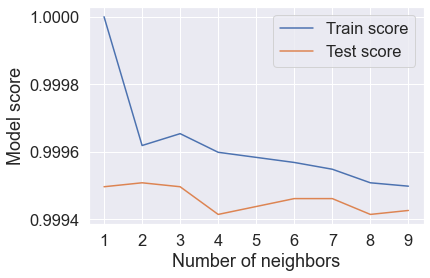

In [98]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(np.arange(1, 10, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')

We can see that n_neighbors = 2 still gives us the highest test score. 

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomFroestClassifier()

... using RandomizedSearchCV

In [56]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2), 
           'min_samples_leaf': np.arange(1, 20, 2)}

In [57]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [58]:
np.arange(10, 1000, 50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

Now we've got hyperparameter grids setup for each of our models; 
let's tune them using RandomizedSearchCV

In [59]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5, 
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [60]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [61]:
rs_log_reg.score(X_test, y_test)

0.9992275552122467

Now we've tuned LogisticRegeression(), let's do the same for RandomForestClassifier()

In [62]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5, 
                           n_iter = 5,
                           verbose = True)

# Fit random hyperparameter search model for RandomForesetClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [63]:
# Find the beset hyperparameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [64]:
# Evaluate teh randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.999403110845827

## Hyperparameter tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [65]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 5), # we can put 30 here, but given the size of the dataset, here we only use 5
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid, 
                          cv = 5,
                          verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [66]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 100.0, 'solver': 'liblinear'}

In [67]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.9992275552122467

## Evaluating our tuned machine learning classifier, beyong accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [68]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [69]:
y_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

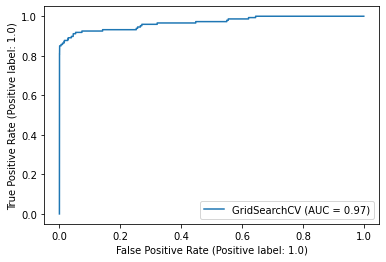

In [72]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [73]:
# Confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[85285    11]
 [   55    92]]


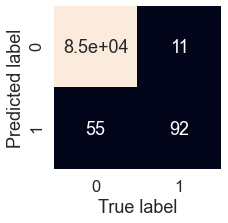

In [75]:
import seaborn as sns
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                     annot = True,
                     cbar = False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix; let's get a classification report as well as corss-validated precision, recall and f1-score.

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.89      0.63      0.74       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so, we'll be using `cross_val_score()`.

In [78]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 100.0, 'solver': 'liblinear'}

In [79]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 100, 
                         solver = 'liblinear')

In [81]:
# Cross-validated accuracy
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')
cv_acc

array([0.99898178, 0.99933289, 0.99894665, 0.99928021, 0.99903443])

In [82]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9991151899908151

In [83]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8672164200041186

In [84]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.5992372706658421

In [85]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.6956175220154759

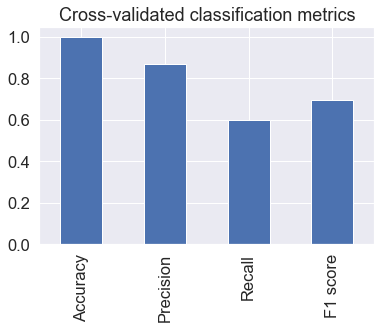

In [86]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1 score': cv_f1}, index = [0])

cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics', legend = False);

### Feature Importance

Feature importance is another as asking, 'which features contributed most to the outcomes of the model and how did they contribute?'

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model.

In [87]:
# Fit an instance of LogisticsRegression
# gs_log_reg.best_params_

clf = LogisticRegression(C = 100, solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=100, solver='liblinear')

In [88]:
# Check coef_
clf.coef_

array([[ 5.76598812e-02, -5.29789196e-02,  6.41781242e-02,
         6.69016629e-01, -3.00487272e-02, -8.67032331e-02,
        -2.99379001e-02, -1.64029749e-01, -2.49227317e-01,
        -7.97693469e-01,  5.40532293e-02,  1.20668658e-01,
        -3.27217675e-01, -6.07823990e-01, -1.44049399e-01,
        -1.42998064e-01, -3.44596964e-02, -4.73143280e-02,
         5.50626986e-04, -2.84303795e-01,  3.98591986e-01,
         4.71925598e-01, -8.87783355e-02,  1.46473026e-01,
        -1.50889649e-01,  2.39625319e-01, -6.52014955e-01,
        -2.54206941e-01]])

In [90]:
# Match coefficients of features to columns
feature_dict = dict(zip(creditCardData.columns, list(clf.coef_[0])))
feature_dict

{'V1': 0.05765988119736463,
 'V2': -0.052978919619209024,
 'V3': 0.06417812417490501,
 'V4': 0.6690166290514762,
 'V5': -0.030048727209503575,
 'V6': -0.08670323312488493,
 'V7': -0.029937900064893302,
 'V8': -0.16402974861499986,
 'V9': -0.2492273173173965,
 'V10': -0.7976934692553644,
 'V11': 0.05405322925175439,
 'V12': 0.12066865806300239,
 'V13': -0.327217674955956,
 'V14': -0.6078239899914561,
 'V15': -0.14404939850773027,
 'V16': -0.14299806418997654,
 'V17': -0.03445969641680259,
 'V18': -0.04731432796440994,
 'V19': 0.0005506269864847199,
 'V20': -0.2843037947375153,
 'V21': 0.39859198566784476,
 'V22': 0.4719255976888205,
 'V23': -0.08877833553945302,
 'V24': 0.14647302552699304,
 'V25': -0.15088964850117595,
 'V26': 0.23962531850609503,
 'V27': -0.6520149551593615,
 'V28': -0.2542069409065073}

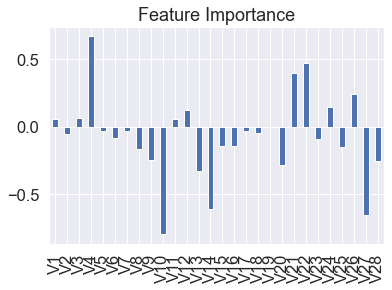

In [91]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

**What can you do with this information (coefficients)?**

This is something you might want to talk to a subject matter expert about. 
They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) 
as well as where it's not (lowest correlation).

**Doing this has a few benefits:**

1. Finding out more - If some of the correlations and feature importances are confusing, 
a subject matter expert may be able to shed some light on the situation and help you figure out more.
2. Redirecting efforts - If some features offer far more value than others, 
this may change how you collect data for different problems. (See point 3.)
3. Less but better - Similar to above, if some features are offering far more value than others, 
you could reduce the number of features your model tries to find patterns in 
as well as improve the ones which offer the most. 
This could potentially lead to saving on computation, by having a model find patterns across less features, 
whilst still achieving the same performance levels.

## 6. Experimentation

If you haven't hit your evaluation metric yet, ask yourself:

* Could you collect more data? 
* Could you try a better model? Like CatBoost, or XGBoost?
* Could you improve the current models? (beyong what we've done so far)
* If your model is good enough (you have hit your evaluation metric), how would you export it and share it with others? 


Now we can also put together a great report containing a confusion matrix, 
a handful of cross-valdated metrics such as precision, recall and F1 
as well as which features contribute most to the model making a decision.